In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action = 'ignore')
warnings.filterwarnings('ignore')

In [2]:
# 한글꺠지는 것 방지
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# Data Loading

In [3]:
demo = pd.read_csv('C:/Users/wnrrh/Desktop/태준/롯데멤버스/LPOINT_BIG_COMP_01_DEMO.csv', encoding = 'utf-8', delimiter = ',')
pdde = pd.read_csv('C:/Users/wnrrh/Desktop/태준/롯데멤버스/LPOINT_BIG_COMP_02_PDDE.csv', encoding = 'utf-8', delimiter = ',')
copu = pd.read_csv('C:/Users/wnrrh/Desktop/태준/롯데멤버스/LPOINT_BIG_COMP_03_COP_U.csv', encoding = 'utf-8', delimiter = ',')
clac = pd.read_csv('C:/Users/wnrrh/Desktop/태준/롯데멤버스/LPOINT_BIG_COMP_04_PD_CLAC.csv', encoding = 'utf-8', delimiter = ',')
br = pd.read_csv('C:/Users/wnrrh/Desktop/태준/롯데멤버스/LPOINT_BIG_COMP_05_BR.csv', encoding = 'utf-8', delimiter = ',')
lpay = pd.read_csv('C:/Users/wnrrh/Desktop/태준/롯데멤버스/LPOINT_BIG_COMP_06_LPAY.csv', encoding = 'utf-8', delimiter = ',')

In [4]:
demo.rename(columns={'cust':'고객코드', 'ma_fem_dv':'성별', 'ages':'연령대', 'zon_hlv':'거주지대분류코드'},inplace=True)
pdde.rename(columns = {'cust':'고객코드', 'rct_no':'영수증번호', 'chnl_dv':'채널구분', 'cop_c':'제휴사', 'br_c':'점포코드', 'pd_c':'상품코드', 'de_dt':'구매일자', 'de_hr':'구매시간', 'buy_am':'구매금액', 'buy_ct':'구매수량'}, inplace=True)
copu.rename(columns = {'cust':'고객코드', 'rct_no':'영수증번호', 'chnl_dv':'채널구분', 'cop_c':'제휴사', 'br_c':'점포코드', 'pd_c':'상품코드', 'de_dt':'구매일자', 'vst_dt':'제휴사 방문일자', 'de_hr':'구매시간', 'buy_am':'구매금액'}, inplace=True)
clac.rename(columns = {'pd_c':'상품코드','pd_nm':'상품 소분류명', 'clac_hlv_nm':'상품 대분류명','clac_mcls_nm':'상품 중분류명'},inplace=True)
br.rename(columns = {'br_c':'점포코드', 'cop_c':'제휴사', 'zon_hlv':'점포지역대분류코드','zon_mcls':'점포지역중분류코드'},inplace=True)
lpay.rename(columns = {'cust':'고객코드','rct_no':'영수증번호', 'cop_c':'제휴사', 'chnl_dv':'채널구분','de_dt':'구매일자', 'de_hr':'구매시간', 'buy_am':'구매금액'},inplace=True)

<AxesSubplot:>

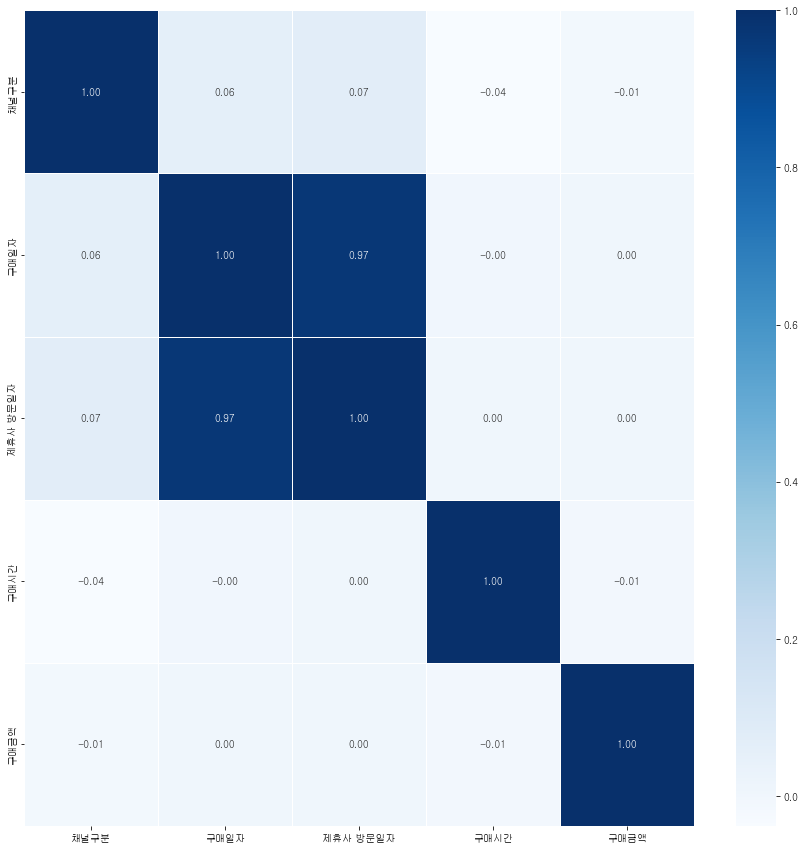

In [5]:
plt.figure(figsize=(15,15))
sns.heatmap(data = copu.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [6]:
pdde['타입'] = 'Product'
copu['타입'] = 'Affiliate'
lpay['타입'] = 'Lpay'
copu['구매수량'] = 0
copu['상품코드'] = np.nan
lpay['점포코드'] = np.nan
lpay['상품코드'] = np.nan
lpay['구매수량'] = 0

In [7]:
copu = copu[['고객코드','영수증번호','채널구분','제휴사','점포코드','상품코드','구매일자','구매시간','구매금액','구매수량','타입']]
lpay = lpay[['고객코드','영수증번호','채널구분','제휴사','점포코드','상품코드','구매일자','구매시간','구매금액','구매수량','타입']]

In [8]:
lpay['영수증번호'] = lpay['영수증번호'].astype('object')
lpay['점포코드'] = lpay['점포코드'].astype('object')
copu['상품코드'] = copu['상품코드'].astype('object')
lpay['상품코드'] = lpay['상품코드'].astype('object')
pdde['구매금액'] = pdde['구매금액'].astype('int')

In [9]:
df = pd.concat([pdde,copu,lpay])

In [10]:
df = pd.merge(df,demo, on = ['고객코드'], how = 'left')

In [11]:
df = pd.merge(df,br, on = ['점포코드','제휴사'], how = 'left')

In [12]:
df = pd.merge(df,clac, on = ['상품코드'], how = 'left')

In [13]:
df.isnull().sum()

고객코드              0
영수증번호             0
채널구분              0
제휴사               0
점포코드         781740
상품코드         601488
구매일자              0
구매시간              0
구매금액              0
구매수량              0
타입                0
성별                0
연령대               0
거주지대분류코드          0
점포지역대분류코드    781740
점포지역중분류코드    781740
상품 소분류명      601488
상품 대분류명      601488
상품 중분류명      601488
dtype: int64

## 결측치 왜 생겼는지 확인 

In [14]:
print(lpay.isnull().sum())
print('------------------------------')
print(copu.isnull().sum())
print('------------------------------')
print(pdde.isnull().sum())

고객코드          0
영수증번호         0
채널구분          0
제휴사           0
점포코드     353184
상품코드     353184
구매일자          0
구매시간          0
구매금액          0
구매수량          0
타입            0
dtype: int64
------------------------------
고객코드          0
영수증번호         0
채널구분          0
제휴사           0
점포코드         55
상품코드     248304
구매일자          0
구매시간          0
구매금액          0
구매수량          0
타입            0
dtype: int64
------------------------------
고객코드          0
영수증번호         0
채널구분          0
제휴사           0
점포코드     428501
상품코드          0
구매일자          0
구매시간          0
구매금액          0
구매수량          0
타입            0
dtype: int64


# 데이터프레임 분할하여 엘페이 이력 중복처리 

In [15]:
df_product = df[df['타입'] == 'Product']
df_aff = df[df['타입'] == 'Affiliate']
df_lpay = df[df['타입'] == 'Lpay']

In [16]:
# 한 row 내 모든 데이터 값이 동일한 row인 경우 중복제거 처리 첫값은 False, 이후 중복되면 False
product_row = df_product.duplicated(['고객코드','영수증번호','채널구분','제휴사','점포코드','상품코드','구매일자','구매시간','구매금액','구매수량','타입','성별','연령대','거주지대분류코드','점포지역대분류코드','점포지역중분류코드','상품 소분류명','상품 대분류명', '상품 중분류명'], keep='first')

In [17]:
df_product = pd.concat([df_product, product_row], axis=1)

In [18]:
df_product[0].value_counts()

False    4144389
True      237354
Name: 0, dtype: int64

In [19]:
# 중복값 제거 
df_product.rename(columns = {0:'중복값 기준'},inplace=True)

In [20]:
idx = df_product[df_product['중복값 기준'] == True].index
df_product.drop(idx, axis=0, inplace=True)
df_product.reset_index(drop=True , inplace=True)

In [21]:
df_product.drop(['중복값 기준'], axis=1, inplace=True)

In [22]:
### 제휴사 이용정보, 제품 구매정보에 엘페이 데이터 merge
df_lpay.drop(['점포코드','상품코드','점포지역대분류코드','구매수량','점포지역중분류코드','상품 소분류명','상품 대분류명','상품 중분류명','타입'],axis=1, inplace=True)

In [23]:
df_lpay.rename(columns = {'영수증번호':'엘페이 결제번호'},inplace=True)
df_lpay['엘페이 결제이력'] = 1

### 유통사, 제휴사 이용정보에 엘페이 merge

In [24]:
# 제휴사 merge
df_aff.reset_index(drop=True,inplace=True)
df_aff.reset_index(drop=False,inplace=True)

In [25]:
df_aff = pd.merge(df_aff, df_lpay, on = ['고객코드','채널구분','제휴사','구매일자','구매시간','구매금액','성별','연령대','거주지대분류코드'], how = 'left')

In [26]:
df_aff = df_aff.drop_duplicates(['index'], keep='first')

In [27]:
df_aff.drop(['index'],axis=1,inplace=True)
df_aff.reset_index(drop=True, inplace=True)

In [28]:
df_product.reset_index(drop=False, inplace=True)

In [29]:
df_product = pd.merge(df_product, df_lpay, on = ['고객코드','채널구분','제휴사','구매일자','구매시간','구매금액','성별','연령대','거주지대분류코드'], how = 'left')

In [30]:
df_product.drop_duplicates(['index'], keep='first',inplace=True)
df_product.reset_index(drop=True,inplace=True)

In [31]:
df_product.drop(['index'],axis=1,inplace=True)

In [32]:
df = pd.concat([df_product, df_aff],axis=0)

In [33]:
df

,고객코드,영수증번호,채널구분,제휴사,점포코드,상품코드,구매일자,구매시간,구매금액,구매수량,...,성별,연령대,거주지대분류코드,점포지역대분류코드,점포지역중분류코드,상품 소분류명,상품 대분류명,상품 중분류명,엘페이 결제번호,엘페이 결제이력
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000,1,...,여성,50대,Z17,Z10,Z10042,남성티셔츠,남성의류,남성의류상의,NaN,NaN
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700,1,...,여성,40대,Z13,Z13,Z13001,기타주방일회용품,주방잡화,주방일회용품,NaN,NaN
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000,1,...,여성,50대,Z17,Z10,Z10042,남성티셔츠,남성의류,남성의류상의,NaN,NaN
3,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000,1,...,여성,50대,Z17,Z10,Z10042,남성티셔츠,남성의류,남성의류상의,NaN,NaN
4,M430112881,A01000005297,1,A01,A010039,PD1692,20210101,10,9900,1,...,여성,50대,Z17,Z10,Z10042,커피/음료,테넌트/음식점,식당,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248299,M058650684,21111614C021426818,1,C02,C020002,NaN,20211116,14,2000,0,...,여성,20대,Z10,Z17,Z17018,NaN,NaN,NaN,NaN,NaN
248300,M058650684,21111619C023223432,1,C02,C020002,NaN,20211116,19,26900,0,...,여성,20대,Z10,Z17,Z17018,NaN,NaN,NaN,NaN,NaN
248301,M014154595,21121209C015324520,2,C01,C010087,NaN,20211212,9,2000,0,...,여성,30대,Z12,Z14,Z14005,NaN,NaN,NaN,NaN,NaN
248302,M510878172,21112719C013369102,2,C01,C010007,NaN,20211127,19,6000,0,...,남성,20대,Z17,Z17,Z17013,NaN,NaN,NaN,NaN,NaN


In [34]:
# 엘페이 결제이력 결측치 0으로 처리
df['엘페이 결제이력'] = df['엘페이 결제이력'].fillna(0)

In [35]:
df.reset_index(drop=True,inplace=True)

In [36]:
df_lpay.reset_index(drop=True,inplace=True)

### 아래 칸 진행 X

In [37]:
idx = df_lpay[df_lpay['엘페이 결제번호'].isin(df['엘페이 결제번호']) == True].index

In [38]:
df_lpay.drop(idx, axis=0,inplace=True)

In [39]:
df_lpay['타입'] = 'Lpay'

### 여기서부터 코드 실행 (LPAY 중복되는 부분 버리지 말고 가져가는 거로)

In [40]:
df = pd.concat([df,df_lpay])

In [41]:
df

,고객코드,영수증번호,채널구분,제휴사,점포코드,상품코드,구매일자,구매시간,구매금액,구매수량,...,성별,연령대,거주지대분류코드,점포지역대분류코드,점포지역중분류코드,상품 소분류명,상품 대분류명,상품 중분류명,엘페이 결제번호,엘페이 결제이력
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000,1.0,...,여성,50대,Z17,Z10,Z10042,남성티셔츠,남성의류,남성의류상의,NaN,0.0
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700,1.0,...,여성,40대,Z13,Z13,Z13001,기타주방일회용품,주방잡화,주방일회용품,NaN,0.0
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000,1.0,...,여성,50대,Z17,Z10,Z10042,남성티셔츠,남성의류,남성의류상의,NaN,0.0
3,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000,1.0,...,여성,50대,Z17,Z10,Z10042,남성티셔츠,남성의류,남성의류상의,NaN,0.0
4,M430112881,A01000005297,1,A01,A010039,PD1692,20210101,10,9900,1.0,...,여성,50대,Z17,Z10,Z10042,커피/음료,테넌트/음식점,식당,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353178,M470112503,NaN,2,A06,NaN,NaN,20210104,21,50920,NaN,...,여성,50대,Z16,NaN,NaN,NaN,NaN,NaN,210104210651243,1.0
353179,M470112503,NaN,2,A06,NaN,NaN,20210125,11,51800,NaN,...,여성,50대,Z16,NaN,NaN,NaN,NaN,NaN,210125110644545,1.0
353180,M470112503,NaN,2,A06,NaN,NaN,20210104,21,6440,NaN,...,여성,50대,Z16,NaN,NaN,NaN,NaN,NaN,210104210652271,1.0
353181,M748878049,NaN,1,A02,NaN,NaN,20210119,20,17600,NaN,...,여성,30대,Z10,NaN,NaN,NaN,NaN,NaN,210119200278240,1.0


In [42]:
df['엘페이 결제이력'].unique()

array([0., 1.])

In [122]:
df['엘페이 결제이력'] = df['엘페이 결제이력'].fillna(0)
df['엘페이 결제이력'] = df['엘페이 결제이력'].astype('int')

In [126]:
df.to_csv('C:/Users/wnrrh/Desktop/0712.csv', encoding = 'utf-8', index=False)

# 데이터프레임 타입별로 분할하여 각자 EDA 진행하기! 

In [44]:
df = pd.read_csv('C:/Users/wnrrh/desktop/0712.csv', encoding = 'utf-8',delimiter = ',')

In [45]:
len(df['상품 소분류명'].unique())

1933

In [46]:
df_aff = df[df['타입'] == 'Affiliate']

In [47]:
df_aff.reset_index(drop=True,inplace=True)

In [48]:
df_aff2 = df_aff.drop(['상품코드','상품 소분류명','상품 중분류명','상품 대분류명'],axis=1)

In [49]:
df_aff2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248304 entries, 0 to 248303
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   고객코드       248304 non-null  object 
 1   영수증번호      248304 non-null  object 
 2   채널구분       248304 non-null  int64  
 3   제휴사        248304 non-null  object 
 4   점포코드       248249 non-null  object 
 5   구매일자       248304 non-null  int64  
 6   구매시간       248304 non-null  int64  
 7   구매금액       248304 non-null  int64  
 8   구매수량       248304 non-null  float64
 9   타입         248304 non-null  object 
 10  성별         248304 non-null  object 
 11  연령대        248304 non-null  object 
 12  거주지대분류코드   248304 non-null  object 
 13  점포지역대분류코드  248249 non-null  object 
 14  점포지역중분류코드  248249 non-null  object 
 15  엘페이 결제번호   21114 non-null   float64
 16  엘페이 결제이력   248304 non-null  int64  
dtypes: float64(2), int64(5), object(10)
memory usage: 32.2+ MB


In [50]:
df_aff2['구매일자'] = df_aff2['구매일자'].astype('str')
df_aff2['구매수량'] = df_aff2['구매수량'].astype('int')

In [51]:
df_aff2['구매년도'] = df_aff2['구매일자'].str[0:4]
df_aff2['구매월'] = df_aff2['구매일자'].str[4:6]
df_aff2['구매일'] = df_aff2['구매일자'].str[6:]

In [52]:
df_aff2['엘페이 결제이력'].value_counts()

0    227190
1     21114
Name: 엘페이 결제이력, dtype: int64

## Column classification

In [53]:
# unique column 파악
print(len(df_aff2['고객코드'].unique()))
print(len(df_aff2['영수증번호'].unique()))
print(len(df_aff2['점포코드'].unique()))

21769
248304
2030


In [54]:
# Time column
print(len(df_aff2['구매일자'].unique()))
print(len(df_aff2['구매시간'].unique()))
print(len(df_aff2['구매금액'].unique()))
print(len(df_aff2['구매년도'].unique()))
print(len(df_aff2['구매월'].unique()))
print(len(df_aff2['구매일'].unique()))

369
24
9420
2
12
31


In [55]:
# Non unique column
print(len(df_aff2['채널구분'].unique()))
print(len(df_aff2['제휴사'].unique()))
print(len(df_aff2['성별'].unique()))
print(len(df_aff2['연령대'].unique()))
print(len(df_aff2['거주지대분류코드'].unique()))
print(len(df_aff2['점포지역대분류코드'].unique()))
print(len(df_aff2['점포지역중분류코드'].unique()))
print(len(df_aff2['엘페이 결제이력'].unique()))

2
6
2
6
17
18
236
2


## EDA

In [56]:
df_aff2['성별'] = df_aff2['성별'].replace(1, '여성')
df_aff2['성별'] = df_aff2['성별'].replace(0, '남성')

### Outlier 확인

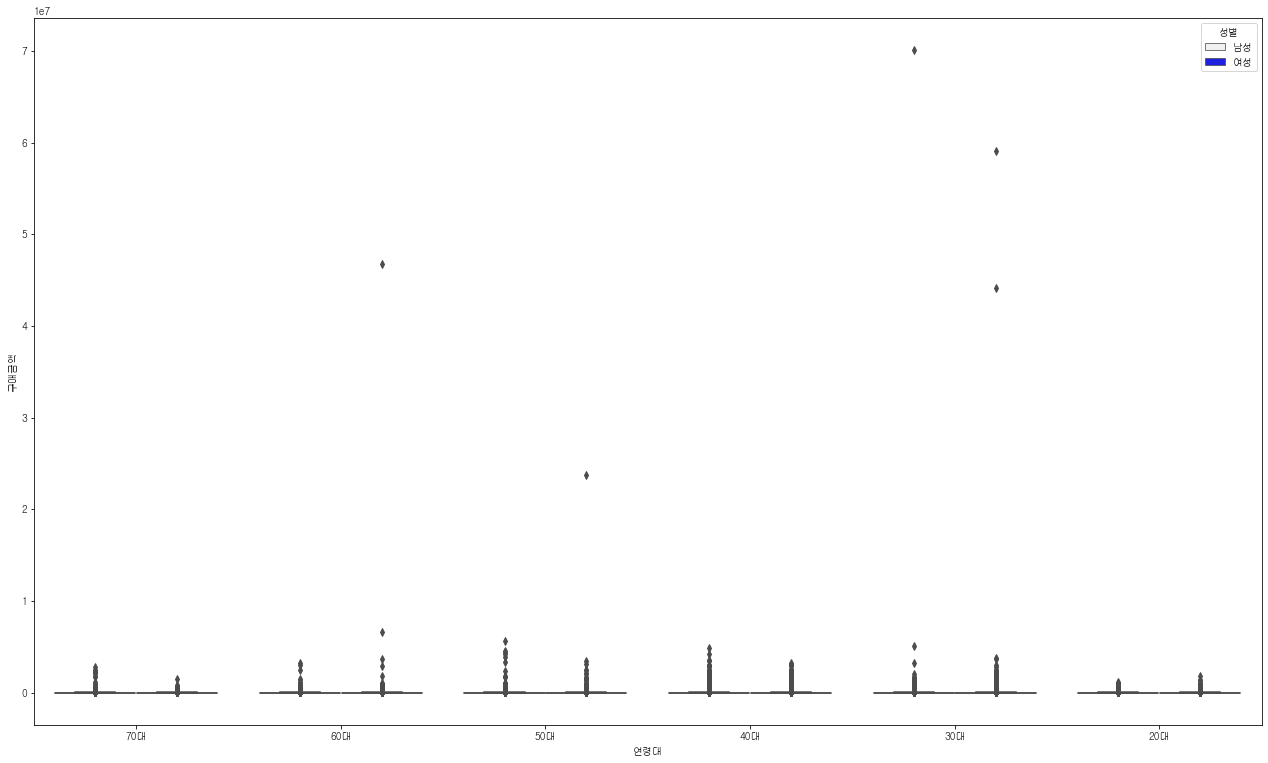

In [57]:
# 연령대별
plt.figure(figsize = (22,13))
sns.boxplot(data=df_aff2, x="연령대", y="구매금액", hue="성별", color = 'blue')
plt.show()

In [58]:
df_aff2[(df_aff2['연령대'] =='60대') & (df_aff2['구매금액']>4*1e7)]

,고객코드,영수증번호,채널구분,제휴사,점포코드,구매일자,구매시간,구매금액,구매수량,타입,성별,연령대,거주지대분류코드,점포지역대분류코드,점포지역중분류코드,엘페이 결제번호,엘페이 결제이력,구매년도,구매월,구매일
1536,M034936927,21102420B014041708,1,B01,B010014,20211024,20,46810900,0,Affiliate,여성,60대,Z17,Z17,Z17018,NaN,0,2021,10,24


In [59]:
df_aff2[(df_aff2['연령대'] =='30대') & (df_aff2['구매금액']>4*1e7)]

,고객코드,영수증번호,채널구분,제휴사,점포코드,구매일자,구매시간,구매금액,구매수량,타입,성별,연령대,거주지대분류코드,점포지역대분류코드,점포지역중분류코드,엘페이 결제번호,엘페이 결제이력,구매년도,구매월,구매일
68765,M867765456,21022719B010855120,1,B01,B010019,20210227,19,59090000,0,Affiliate,여성,30대,Z17,Z17,Z17018,NaN,0,2021,02,27
215100,M439502359,21112714B010943839,1,B01,B010014,20211127,14,44141200,0,Affiliate,여성,30대,Z10,Z17,Z17018,NaN,0,2021,11,27
216683,M481734389,21102320B015974616,1,B01,B010019,20211023,20,70092000,0,Affiliate,남성,30대,Z17,Z17,Z17018,NaN,0,2021,10,23


In [60]:
df_aff2[df_aff2['점포코드'] == 'B010019']['구매금액'].describe()

count    5.970000e+02
mean     6.470240e+05
std      3.769017e+06
min      2.000000e+03
25%      7.200000e+04
50%      2.500000e+05
75%      6.104000e+05
max      7.009200e+07
Name: 구매금액, dtype: float64

타겟 변수인 구매금액으로 보아, Outlier 제거 필요

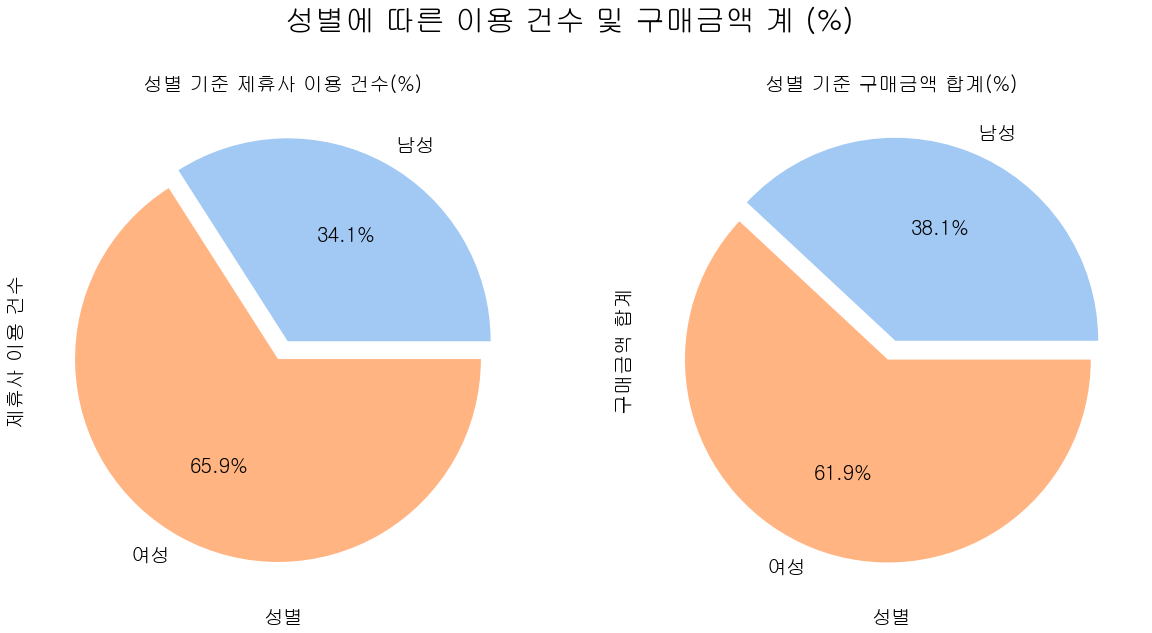

In [61]:
# 성별에 따른 제휴사 이용 건수 및 구매금액 
color = sns.color_palette('pastel')[:10]
a = df_aff2.groupby("성별")["고객코드"].count()
b = df_aff2.groupby("성별")["구매금액"].sum()

plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.title("성별 기준 제휴사 이용 건수(%)", fontsize=20)

a.plot(kind = 'pie', explode = [0.05, 0.05], autopct='%1.1f%%', textprops={'fontsize':20}, colors=color)
plt.xlabel('성별', fontsize=20)
plt.ylabel('제휴사 이용 건수',fontsize=20)

plt.subplot(1,2,2)
plt.title("성별 기준 구매금액 합계(%)", fontsize=20)

b.plot(kind = 'pie', explode = [0.05, 0.05], autopct='%1.1f%%', textprops={'fontsize' : 20}, colors=color)
plt.xlabel('성별', fontsize=20)
plt.ylabel('구매금액 합계', fontsize=20)

plt.suptitle('성별에 따른 이용 건수 및 구매금액 계 (%)', fontsize = 30)
plt.show()

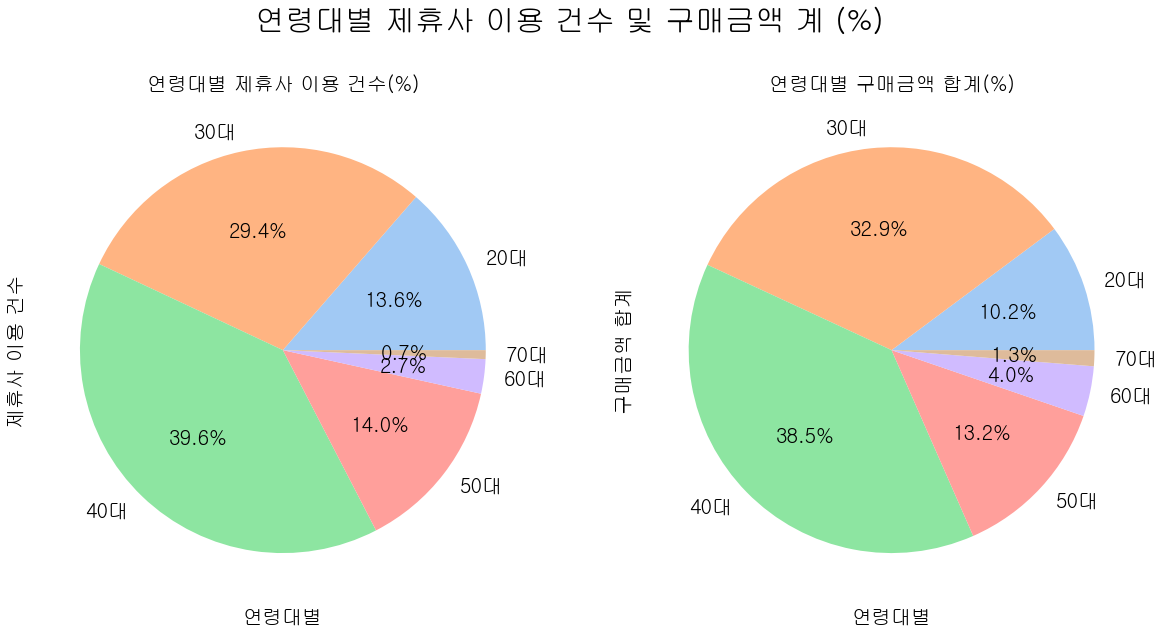

In [62]:
# 연령대별 제휴사 이용 건수 및 구매금액 합계
a = df_aff2.groupby("연령대")["고객코드"].count()
b = df_aff2.groupby("연령대")["구매금액"].sum()

plt.figure(figsize =(20,10))

plt.subplot(1,2,1)
plt.title("연령대별 제휴사 이용 건수(%)", fontsize=20)
a.plot(kind = 'pie', autopct='%1.1f%%', textprops= {'fontsize':20}, colors=color)
plt.xlabel('연령대별', fontsize=20)
plt.ylabel('제휴사 이용 건수',fontsize=20)

plt.subplot(1,2,2)
plt.title("연령대별 구매금액 합계(%)", fontsize=20)
b.plot(kind = 'pie', autopct='%1.1f%%', textprops= {'fontsize':20}, colors=color)
plt.xlabel('연령대별', fontsize=20)
plt.ylabel('구매금액 합계', fontsize=20)

plt.suptitle('연령대별 제휴사 이용 건수 및 구매금액 계 (%)', fontsize = 30)
plt.show()

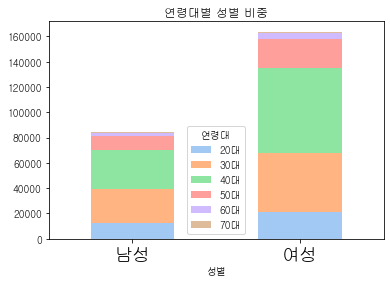

In [63]:
# 연령대별 성별 비중
stacked_bar_df = df_aff2.groupby(["성별","연령대"]).size().unstack()
stacked_bar_df.plot(kind='bar', stacked=True, color=color)
plt.title("연령대별 성별 비중")
plt.xticks(rotation=0, fontsize=18)
plt.show()

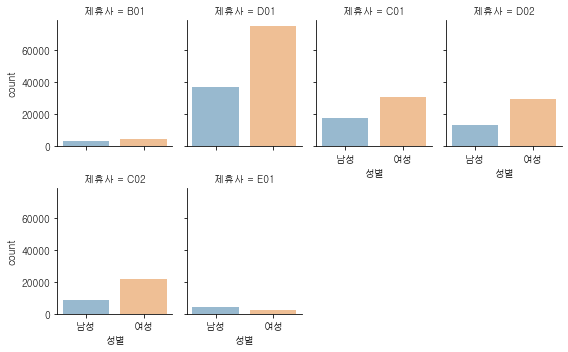

In [64]:
# 제휴사 별 남/녀 이용 건수 비교 
sns.catplot(data=df_aff2, x="성별", kind="count", col="제휴사", col_wrap=4, height=2.5, aspect=.8, alpha=0.5)
plt.show()

array([[<AxesSubplot:title={'center':'남성'}, ylabel='제휴사'>,
        <AxesSubplot:title={'center':'여성'}, ylabel='제휴사'>]], dtype=object)

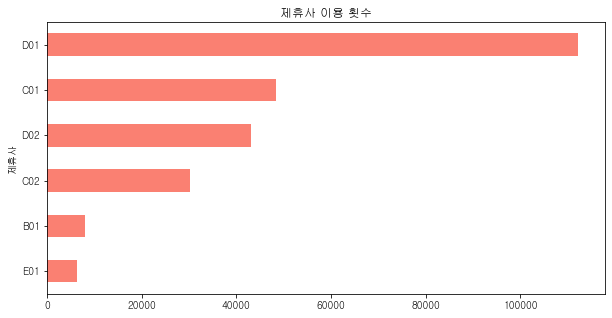

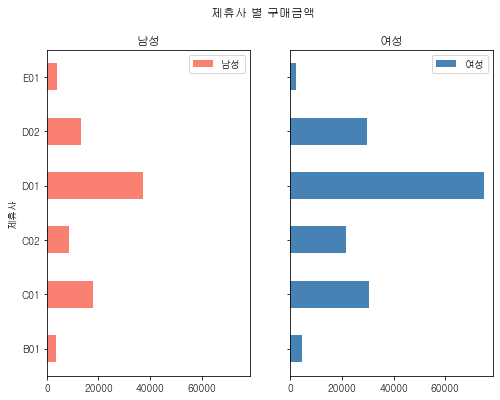

In [65]:
# 제휴사별 이용 횟수
plt.figure(figsize = (10,5))
df_aff2.groupby('제휴사').size().sort_values(ascending=True).plot(kind='barh',color = ['salmon'], title = "제휴사 이용 횟수")
# 성별 구매횟수
pivot_purecnt = pd.pivot_table(df_aff2, index="제휴사", columns ="성별", values="구매금액", aggfunc="size" )
pivot_purecnt.plot(kind ='barh', title = "제휴사 별 구매금액",sharey=True, subplots=True, layout=(1,2), figsize=(8,6), color= ['salmon','steelblue'])

In [66]:
df_aff2['제휴사'].value_counts()

D01    112232
C01     48323
D02     43134
C02     30258
B01      8103
E01      6254
Name: 제휴사, dtype: int64

In [67]:
df_aff2.columns

Index(['고객코드', '영수증번호', '채널구분', '제휴사', '점포코드', '구매일자', '구매시간', '구매금액', '구매수량',
       '타입', '성별', '연령대', '거주지대분류코드', '점포지역대분류코드', '점포지역중분류코드', '엘페이 결제번호',
       '엘페이 결제이력', '구매년도', '구매월', '구매일'],
      dtype='object')

M223630342    261
M295053802    130
M724456397    123
M710368459    115
M678207187     98
M269668794     97
M640148330     96
M837895245     96
M685408649     96
M728453417     95
Name: 고객코드, dtype: int64


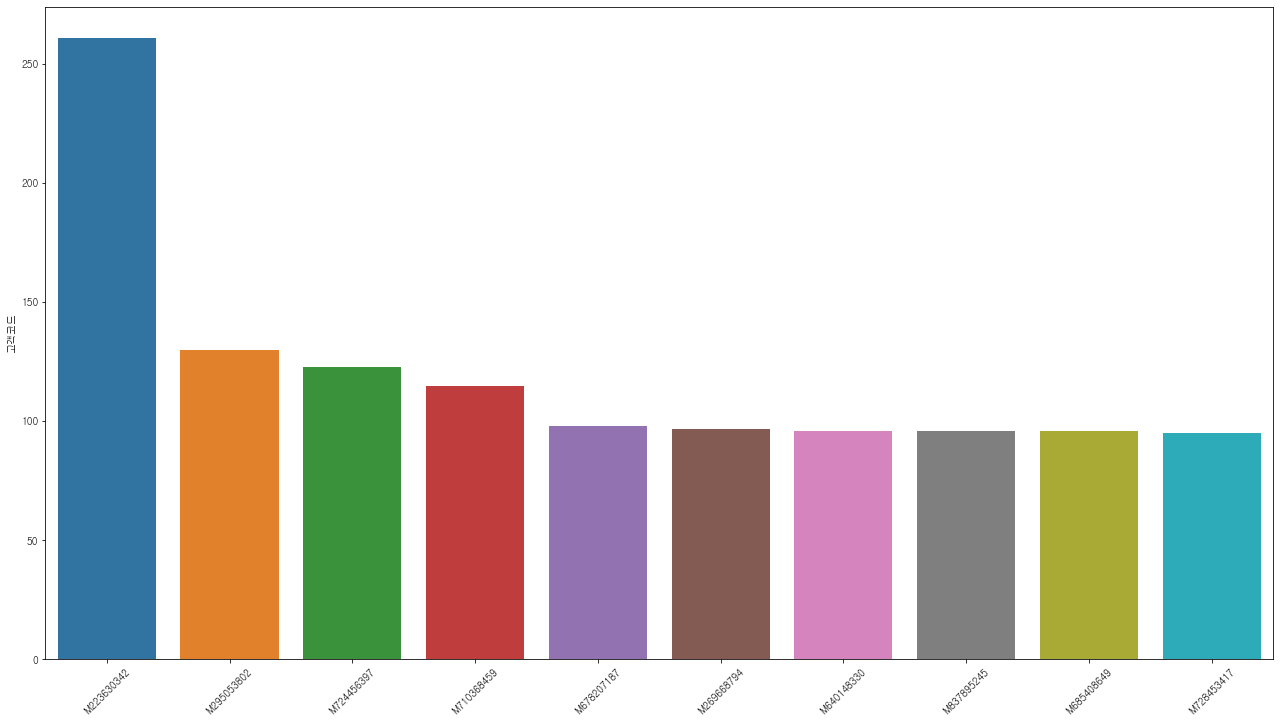

Z17018    47484
Z17001     7192
Z16007     5546
Z17004     5469
Z17020     4167
Z17009     3411
Z16015     3322
Z10047     3310
Z11004     3216
Z17024     3180
Name: 점포지역중분류코드, dtype: int64


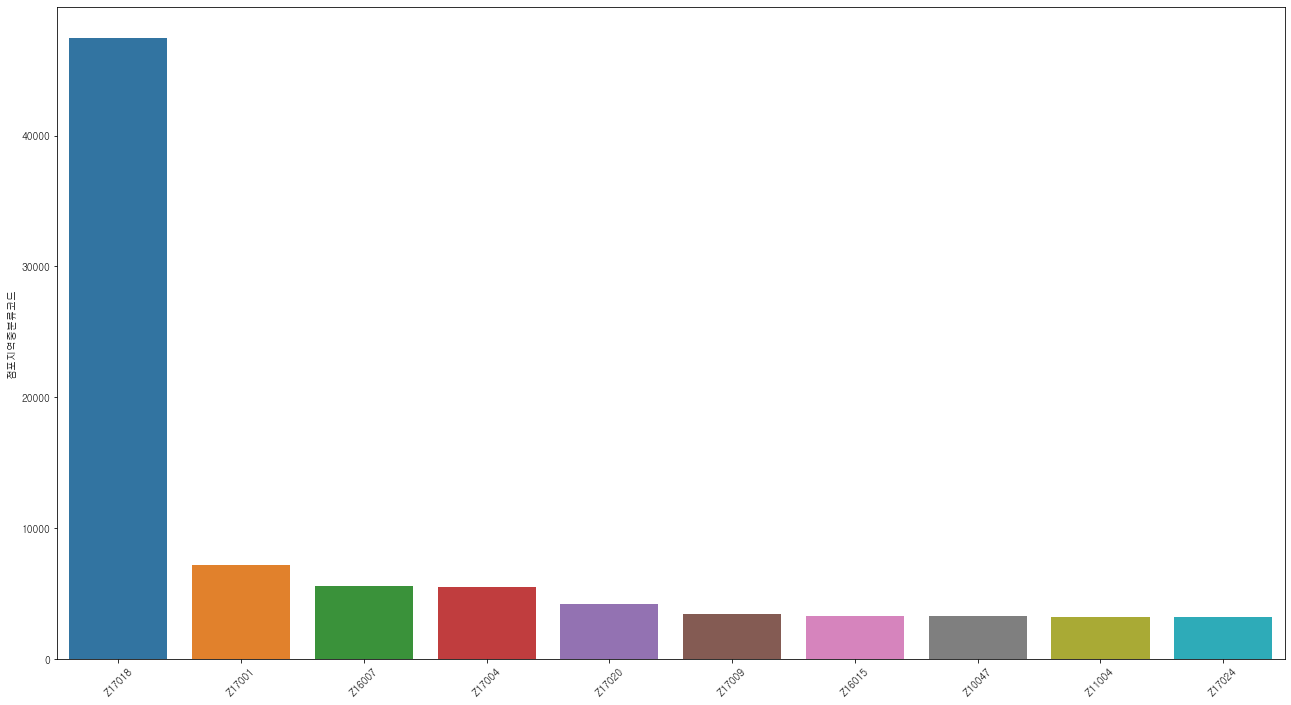

Z17    81259
Z10    64380
Z16    22857
Z11    14125
Z04    13791
Z06     8812
Z13     7276
Z14     6263
Z08     5067
Z15     4867
Name: 거주지대분류코드, dtype: int64


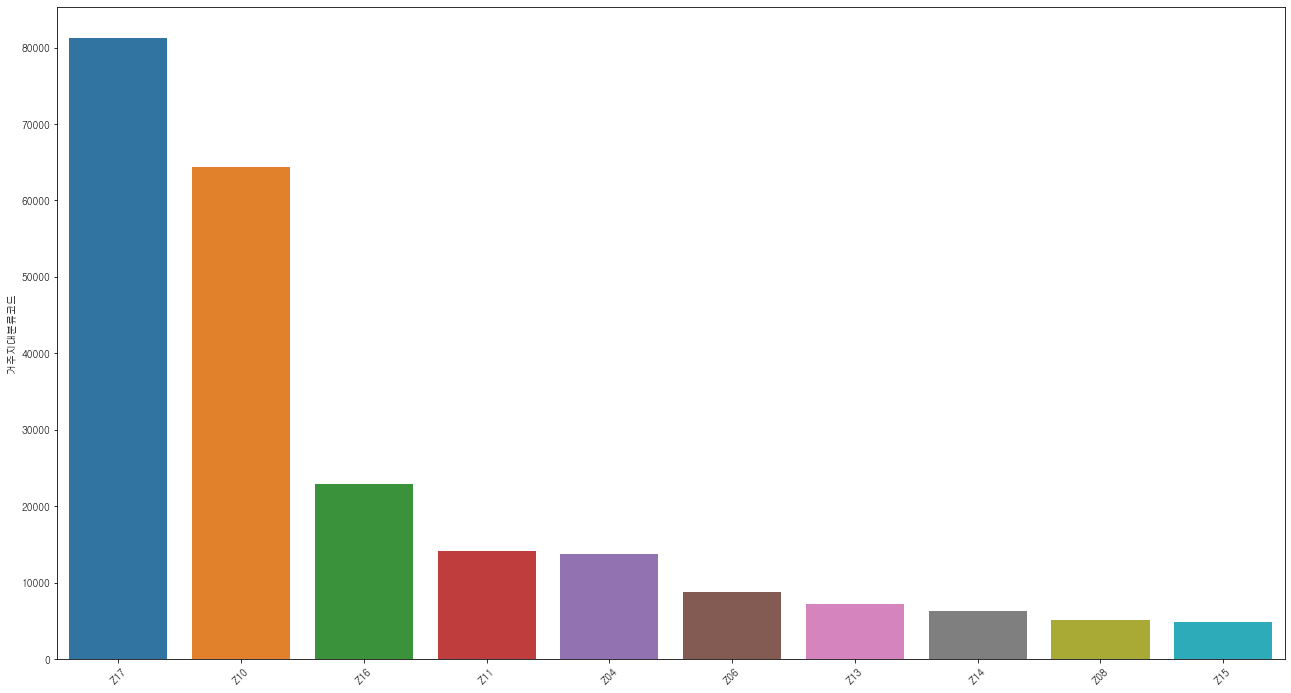

Z17    99802
Z10    43293
Z16    22073
Z11    12664
Z04     9237
Z06     8162
Z14     7250
Z15     6273
Z12     6162
Z08     5754
Name: 점포지역대분류코드, dtype: int64


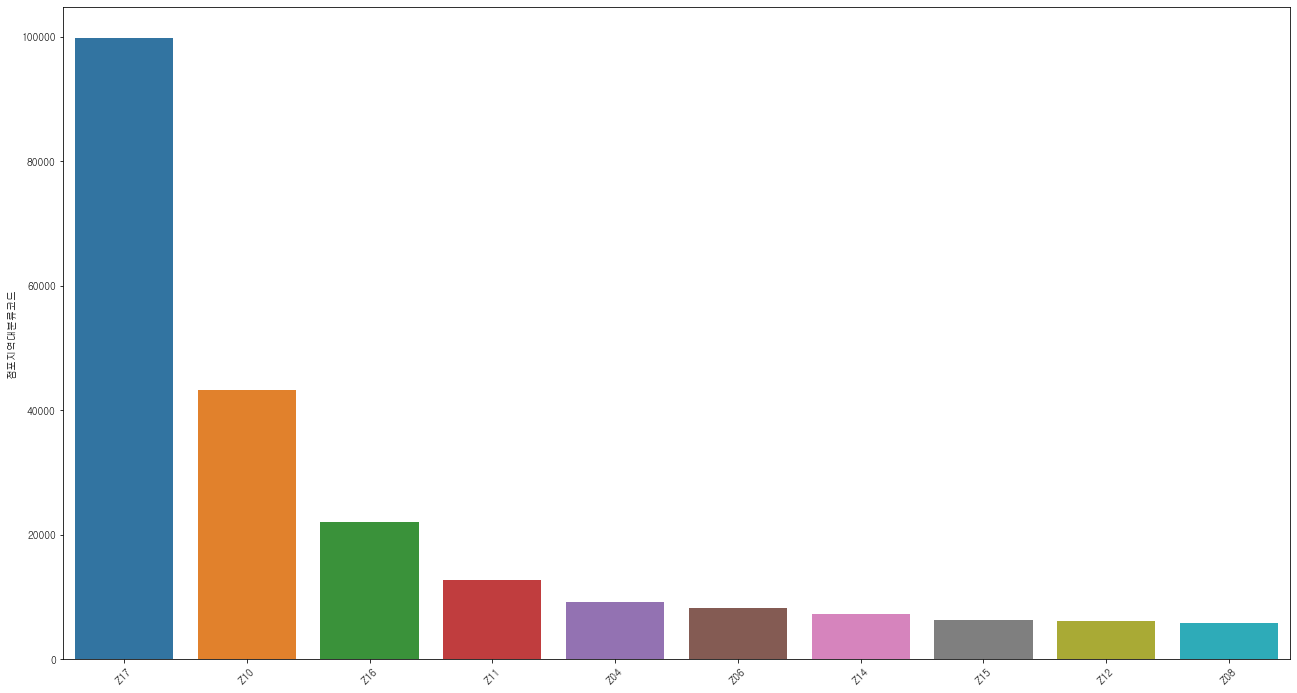

2.111091e+14    4
2.109302e+14    3
2.105262e+14    3
2.101062e+14    3
2.107230e+14    3
2.103182e+14    3
2.104282e+14    2
2.110311e+14    2
2.111272e+14    2
2.111061e+14    2
Name: 엘페이 결제번호, dtype: int64


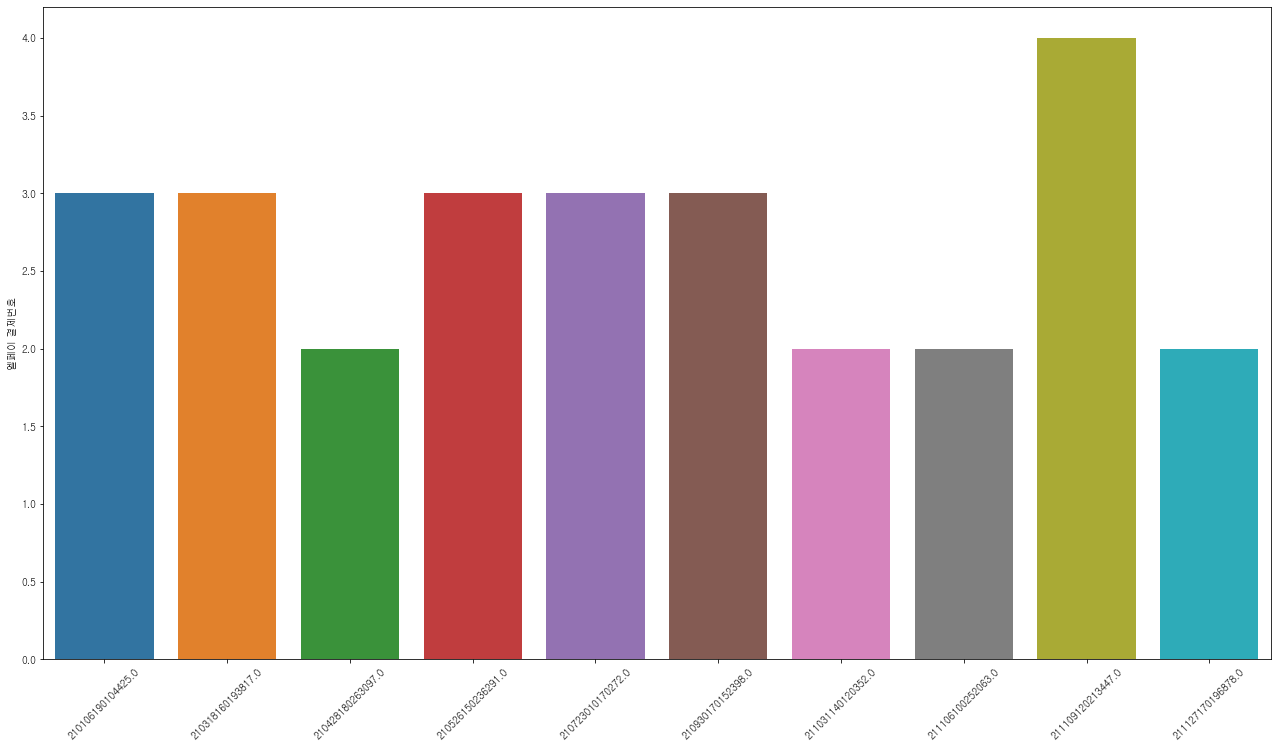

In [68]:
# 점포 정보 비교 (상위 10개만 비교)
top_10_col = ['고객코드','점포지역중분류코드','거주지대분류코드','점포지역대분류코드','엘페이 결제번호']
for col in top_10_col:
  plt.figure(figsize=(22,12))
  print(df_aff2[col].value_counts().head(10))
  chart = sns.barplot(x = df_aff2[col].value_counts().head(10).index, y = df_aff2[col].value_counts().head(10))
  chart.set_xticklabels(chart.get_xticklabels(),rotation=45)
  plt.show()

In [69]:
df_aff2['점포코드'].value_counts().head(25)

C020002    26171
E010001     5724
C010011     5227
C020004     2363
C010014     2021
C010102     1943
B010012     1717
C010003     1500
D010968     1478
B010016     1474
C020001     1460
D020023     1458
C010004     1291
C010096     1236
C010033     1220
C010046     1201
C010010     1170
B010014     1094
D010388     1089
D020013     1031
C010047      987
C010005      980
D020485      966
D020392      961
B010004      898
Name: 점포코드, dtype: int64

In [70]:
df_aff2['거주지대분류코드'].value_counts().head(15)

Z17    81259
Z10    64380
Z16    22857
Z11    14125
Z04    13791
Z06     8812
Z13     7276
Z14     6263
Z08     5067
Z15     4867
Z12     4389
Z03     4160
Z09     3716
Z05     3125
Z01     2574
Name: 거주지대분류코드, dtype: int64

In [71]:
df_aff2['점포지역중분류코드'].value_counts().head(25)

Z17018    47484
Z17001     7192
Z16007     5546
Z17004     5469
Z17020     4167
Z17009     3411
Z16015     3322
Z10047     3310
Z11004     3216
Z17024     3180
Z07002     3091
Z17005     2968
Z10020     2960
Z17006     2955
Z17021     2913
Z16016     2710
Z10028     2634
Z10011     2432
Z06013     2322
Z17011     2286
Z15003     2202
Z04006     2183
Z17013     2069
Z15004     2042
Z16006     1980
Name: 점포지역중분류코드, dtype: int64

In [72]:
df_aff2['점포지역대분류코드'].value_counts().head(15)

Z17    99802
Z10    43293
Z16    22073
Z11    12664
Z04     9237
Z06     8162
Z14     7250
Z15     6273
Z12     6162
Z08     5754
Z05     5444
Z01     4790
Z13     4523
Z09     4429
Z07     4204
Name: 점포지역대분류코드, dtype: int64

In [73]:
df

,고객코드,영수증번호,채널구분,제휴사,점포코드,상품코드,구매일자,구매시간,구매금액,구매수량,...,성별,연령대,거주지대분류코드,점포지역대분류코드,점포지역중분류코드,상품 소분류명,상품 대분류명,상품 중분류명,엘페이 결제번호,엘페이 결제이력
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000,1.0,...,여성,50대,Z17,Z10,Z10042,남성티셔츠,남성의류,남성의류상의,NaN,0
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700,1.0,...,여성,40대,Z13,Z13,Z13001,기타주방일회용품,주방잡화,주방일회용품,NaN,0
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000,1.0,...,여성,50대,Z17,Z10,Z10042,남성티셔츠,남성의류,남성의류상의,NaN,0
3,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000,1.0,...,여성,50대,Z17,Z10,Z10042,남성티셔츠,남성의류,남성의류상의,NaN,0
4,M430112881,A01000005297,1,A01,A010039,PD1692,20210101,10,9900,1.0,...,여성,50대,Z17,Z10,Z10042,커피/음료,테넌트/음식점,식당,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4745872,M470112503,NaN,2,A06,NaN,NaN,20210125,11,51800,NaN,...,여성,50대,Z16,NaN,NaN,NaN,NaN,NaN,2.101251e+14,1
4745873,M470112503,NaN,2,A06,NaN,NaN,20210104,21,6440,NaN,...,여성,50대,Z16,NaN,NaN,NaN,NaN,NaN,2.101042e+14,1
4745874,M748878049,NaN,1,A02,NaN,NaN,20210119,20,17600,NaN,...,여성,30대,Z10,NaN,NaN,NaN,NaN,NaN,2.101192e+14,1
4745875,M748878049,NaN,1,A02,NaN,NaN,20210119,18,12400,NaN,...,여성,30대,Z10,NaN,NaN,NaN,NaN,NaN,2.101192e+14,1


In [74]:
df['타입'] = df['타입'].fillna('Lpay')

In [37]:
for i in df.index:
    if df.loc[i,'타입'] == 'Lpay':
        df.loc[i,'영수증번호'] = df.loc[i,'엘페이 결제번호']

In [38]:
df['타입'].unique()

array(['Product', 'Affiliate', 'Lpay'], dtype=object)

In [39]:
df

,고객코드,영수증번호,채널구분,제휴사,점포코드,상품코드,구매일자,구매시간,구매금액,구매수량,...,성별,연령대,거주지대분류코드,점포지역대분류코드,점포지역중분류코드,상품 소분류명,상품 대분류명,상품 중분류명,엘페이 결제번호,엘페이 결제이력
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000,1.0,...,여성,50대,Z17,Z10,Z10042,남성티셔츠,남성의류,남성의류상의,NaN,0
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700,1.0,...,여성,40대,Z13,Z13,Z13001,기타주방일회용품,주방잡화,주방일회용품,NaN,0
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000,1.0,...,여성,50대,Z17,Z10,Z10042,남성티셔츠,남성의류,남성의류상의,NaN,0
3,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000,1.0,...,여성,50대,Z17,Z10,Z10042,남성티셔츠,남성의류,남성의류상의,NaN,0
4,M430112881,A01000005297,1,A01,A010039,PD1692,20210101,10,9900,1.0,...,여성,50대,Z17,Z10,Z10042,커피/음료,테넌트/음식점,식당,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4745872,M470112503,210125110644545.0,2,A06,NaN,NaN,20210125,11,51800,NaN,...,여성,50대,Z16,NaN,NaN,NaN,NaN,NaN,2.101251e+14,1
4745873,M470112503,210104210652271.0,2,A06,NaN,NaN,20210104,21,6440,NaN,...,여성,50대,Z16,NaN,NaN,NaN,NaN,NaN,2.101042e+14,1
4745874,M748878049,210119200278240.0,1,A02,NaN,NaN,20210119,20,17600,NaN,...,여성,30대,Z10,NaN,NaN,NaN,NaN,NaN,2.101192e+14,1
4745875,M748878049,210119180267206.0,1,A02,NaN,NaN,20210119,18,12400,NaN,...,여성,30대,Z10,NaN,NaN,NaN,NaN,NaN,2.101192e+14,1


In [40]:
df.drop(['엘페이 결제번호'],axis=1,inplace=True)

In [41]:
df.to_csv('C:/Users/wnrrh/desktop/0719.csv',encoding='utf-8', index=False)